Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/5 - Loss: 1781.9677
Epoch 2/5 - Loss: 855.2328
Epoch 3/5 - Loss: 808.8214
Epoch 4/5 - Loss: 806.3361
Epoch 5/5 - Loss: 804.2379
Validation MSE: 779.6551
Validation Loss (MSE): 779.6551


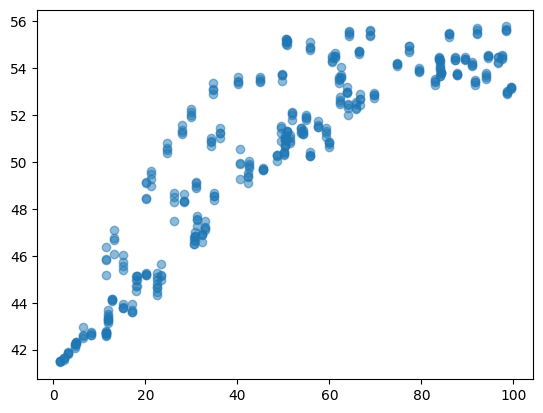

In [4]:
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from generators.poisson_process_generator import PoissonProcessDataset
from models.vanilla_transformer import TransformerModel
from probes.linear_probe import LinearProbe
import matplotlib.pyplot as plt


checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/lightning_logs/version_8/checkpoints/transformer-epoch=154-val_loss=0.06.ckpt"

# Load the trained model
model = TransformerModel.load_from_checkpoint(checkpoint_path)

# Create the DataLoader for evaluation
val_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=100).get_dataloader()

# Initialize the linear probe with the transformer model
probe = LinearProbe(model_path=checkpoint_path, input_dim=128)  # Assuming `d_model` is 128
# Fine-tune the linear probe using the training data (optional)
# If needed, create a train_loader like val_loader and call finetune
train_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=5000).get_dataloader()
probe.finetune(train_loader, num_epochs=5)

# Evaluate the probe on the validation dataset
val_loss, predictions, labels = probe.evaluate(val_loader)
plt.scatter(labels, predictions, alpha=0.5)
print(f"Validation Loss (MSE): {val_loss:.4f}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/20 - Loss: 1195.7575
Epoch 2/20 - Loss: 1187.4004
Epoch 3/20 - Loss: 1181.2718
Epoch 4/20 - Loss: 1177.9429
Epoch 5/20 - Loss: 1172.0553
Epoch 6/20 - Loss: 1168.5760
Epoch 7/20 - Loss: 1163.7128
Epoch 8/20 - Loss: 1159.7458
Epoch 9/20 - Loss: 1155.4246
Epoch 10/20 - Loss: 1151.9480
Epoch 11/20 - Loss: 1145.3712
Epoch 12/20 - Loss: 1140.7571
Epoch 13/20 - Loss: 1137.1809
Epoch 14/20 - Loss: 1133.6466
Epoch 15/20 - Loss: 1128.9925
Epoch 16/20 - Loss: 1126.1663
Epoch 17/20 - Loss: 1122.6145
Epoch 18/20 - Loss: 1118.8775
Epoch 19/20 - Loss: 1114.4998
Epoch 20/20 - Loss: 1109.4904
Validation MSE: 1079.2299
Validation Loss (MSE): 1079.2299


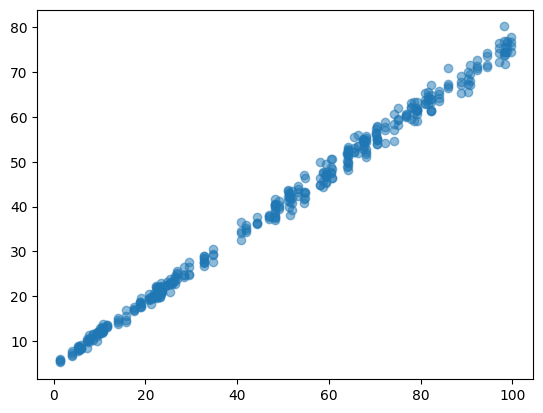

In [2]:
checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/lightning_logs/version_8/checkpoints/transformer-epoch=154-val_loss=0.06.ckpt"

# Load the trained model
model = TransformerModel.load_from_checkpoint(checkpoint_path)

# Create the DataLoader for evaluation
val_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=100).get_dataloader()

# Initialize the linear probe with the transformer model
probe = LinearProbe(model_path=checkpoint_path, input_dim=128, benchmark=True)  # Assuming `d_model` is 128
# Fine-tune the linear probe using the training data (optional)
# If needed, create a train_loader like val_loader and call finetune
train_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=1000).get_dataloader()
probe.finetune(train_loader, num_epochs=20)

# Evaluate the probe on the validation dataset
val_loss, predictions, labels = probe.evaluate(val_loader)
plt.scatter(labels, predictions, alpha=0.5)
print(f"Validation Loss (MSE): {val_loss:.4f}")